<h1><center> Laboratorio di WebScraping </h1>
<h1><center> Anno Accademico 2023-2024 </h1>
<h1><center>  Docente: Laura Ricci </h1>
<h1><center>  Lezione 8</h1>
<h1><center>  Plotting in Pandas e Matplotlib  </h1>
<h1><center>  Merging e Concatanating DtaFrames  </h1>
<h1><center> 28 Febbraio 2024 </h1>

## Assignment 5

* netflix.csv data set: collezione di 6,000 titles disponibili nel Novembre 2019 su Netflix
* 4 colonne: 
    * video’s title
    * director
    * data in cui Netflix h aggiunto il contenuto
    * categoria
* colonne director e date_added contengono valori mancanti (ad esempio posizioni 0, 2, and 5836)

In [2]:
import pandas as pd

netflix = pd.read_csv("DataSets/netflix.csv", parse_dates = ["date_added"])
netflix


C:\Users\ricci\AppData\Local\Temp\ipykernel_13936\2825380978.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  netflix = pd.read_csv("DataSets/netflix.csv", parse_dates = ["date_added"])


,title,director,date_added,type
0,Alias Grace,NaN,2017-11-03,TV Show
1,A Patch of Fog,Michael Lennox,2017-04-15,Movie
2,Lunatics,NaN,2019-04-19,TV Show
3,Uriyadi 2,Vijay Kumar,2019-08-02,Movie
4,Shrek the Musical,Jason Moore,2013-12-29,Movie
...,...,...,...,...
5832,The Pursuit,John Papola,2019-08-07,Movie
5833,Hurricane Bianca,Matt Kugelman,2017-01-01,Movie
5834,Amar's Hands,Khaled Youssef,2019-04-26,Movie
5835,Bill Nye: Science Guy,Jason Sussberg,2018-04-25,Movie


## Assignment 5

* Trovare tutte le righe di contenuti con il titolo **Limitless**


In [3]:
netflix[netflix["title"] == "Limitless"]


,title,director,date_added,type
1559,Limitless,Neil Burger,2019-05-16,Movie
2564,Limitless,NaN,2016-07-01,TV Show
4579,Limitless,Vrinda Samartha,2019-10-01,Movie


## Assignment 5

* Trovare tutte le righe con director **Robert Rodriguez** e tipo **Movie**.


In [4]:
directed_by_robert_rodriguez = (netflix["director"] == "Robert Rodriguez")
is_movie = netflix["type"] == "Movie"
netflix[directed_by_robert_rodriguez & is_movie]


,title,director,date_added,type
1384,Spy Kids: All the Time in the World,Robert Rodriguez,2019-02-19,Movie
1416,Spy Kids 3: Game Over,Robert Rodriguez,2019-04-01,Movie
1460,Spy Kids 2: The Island of Lost Dreams,Robert Rodriguez,2019-03-08,Movie
2890,Sin City,Robert Rodriguez,2019-10-01,Movie
3836,Shorts,Robert Rodriguez,2019-07-01,Movie
3883,Spy Kids,Robert Rodriguez,2019-04-01,Movie


## Assignment 5

* Trovare tutte le righe con data "2019-07-31" o direttore "Robert Altman".


In [5]:
added_on_july_31 = netflix["date_added"] == "2019-07-31"
directed_by_altman = netflix["director"] == "Robert Altman"
netflix[added_on_july_31 | directed_by_altman]


,title,director,date_added,type
611,Popeye,Robert Altman,2019-11-24,Movie
1028,The Red Sea Diving Resort,Gideon Raff,2019-07-31,Movie
1092,Gosford Park,Robert Altman,2019-11-01,Movie
3473,Bangkok Love Stories: Innocence,NaN,2019-07-31,TV Show
5117,Ramen Shop,Eric Khoo,2019-07-31,Movie


## Assignment 5

* Trovare tutte le righe con direttore "Orson Welles", "Aditya Kripalani", o "Sam Raimi".


In [6]:
directors = ["Orson Welles", "Aditya Kripalani", "Sam Raimi"]
target_directors = netflix["director"].isin(directors)
netflix[target_directors]


,title,director,date_added,type
946,The Stranger,Orson Welles,2018-07-19,Movie
1870,The Gift,Sam Raimi,2019-11-20,Movie
3706,Spider-Man 3,Sam Raimi,2019-11-01,Movie
4243,Tikli and Laxmi Bomb,Aditya Kripalani,2018-08-01,Movie
4475,The Other Side of the Wind,Orson Welles,2018-11-02,Movie
5115,Tottaa Pataaka Item Maal,Aditya Kripalani,2019-06-25,Movie


## Assignment 5

* Trovare tutte le righe in cui la data è tra **May 1, 2019** e **June 1, 2019**

In [7]:
may_movies = netflix["date_added"].between("2019-05-01", "2019-06-01")
netflix[may_movies].head()


,title,director,date_added,type
29,Chopsticks,Sachin Yardi,2019-05-31,Movie
60,Away From Home,NaN,2019-05-08,TV Show
82,III Smoking Barrels,Sanjib Dey,2019-06-01,Movie
108,Jailbirds,NaN,2019-05-10,TV Show
124,Pegasus,Han Han,2019-05-31,Movie


## Assignment 5

* Drop tutte le righe con un valore **NaN** nella colonna **director**


In [8]:
netflix.dropna(subset = ["director"]).head()


,title,director,date_added,type
1,A Patch of Fog,Michael Lennox,2017-04-15,Movie
3,Uriyadi 2,Vijay Kumar,2019-08-02,Movie
4,Shrek the Musical,Jason Moore,2013-12-29,Movie
5,Schubert In Love,Lars Büchel,2018-03-01,Movie
6,We Have Always Lived in the Castle,Stacie Passon,2019-09-14,Movie


## Assignment 5

* Trovare i giorni in cui Netflix ha aggiunto **solo un video** al catalogo

In [9]:
netflix.drop_duplicates(subset = ["date_added"], keep = False)


,title,director,date_added,type
4,Shrek the Musical,Jason Moore,2013-12-29,Movie
12,Without Gorky,Cosima Spender,2017-05-31,Movie
30,Anjelah Johnson: Not Fancy,Jay Karas,2015-10-02,Movie
38,One Last Thing,Tim Rouhana,2019-08-25,Movie
70,Marvel's Iron Man & Hulk: Heroes United,Leo Riley,2014-02-16,Movie
...,...,...,...,...
5748,Menorca,John Barnard,2017-08-27,Movie
5749,Green Room,Jeremy Saulnier,2018-11-12,Movie
5788,Chris Brown: Welcome to My Life,Andrew Sandler,2017-10-07,Movie
5789,A Very Murray Christmas,Sofia Coppola,2015-12-04,Movie


## La gerarchia dei Moduli

<center>
<img src="Figures/Hierarchy.jpg" style="width:800px;height:800px;"/>

## Struttura della lezione

* visualizzazione
    * alternative per il plotting
    * esempi con  dataset reali
* combinare **DataFrame**
    * concatenazione
    * merge
        * inner
        * left, right,
        * outer
        

## Plotting con Matplotlib e con Pandas 

* **MatPlotLib**: funzionalità simili a **GnuPlot** e **MatLAb**
    * vantaggio principale: integrazione con Python!
* offre diversi ambienti per la visualizzazione, possono creare molta confusione
* alternative
    * utilizzare direttamente **Matplotlib**, con due possibili modalità:
      * interfaccia *procedurale* simile a **MatLab**
          * utilizzo del modulo **pyplot** 
          * utile quando si usa un unico **plot**
      * interfaccia **object oriented**
          * creazione di oggetti delle classi **figures** e **axes**
          * la più generale e potente
    * utilizzare i metodi per la visualizzazione offerti da **Pandas**
      * wrapper per i metodi di *Matplotlib*
      * funzione **plot** di *Pandas* può essere invocata direttamente su **Series** e **Dataframe**
      * funzionalità ridotte
      * se sono sufficienti, soono molto semplici da utilizzare
     

## Preparazione dei dati: il dataset *crypto-markets.csv* 

* Una riga per ogni giorno in un periodo compreso tra 
    * *slug* : nome della cryptocurrency
    * *symbol* : simbolo della cryptocurrency
    * *name* : nome della cryptocurrency
    * *date*: data dell'osservazione
    * *ranknow* : rank della cryptocurrency in quella data
    * *open* : prezzo di apertura in quella data
    * *high* : prezzo più alto in quella data
    * *low* : prezzo più basso in quella data
    * *close* : prezzo di chiusura in quella data
    * *volume*: volume delle transazioni in quella data
    * *market* : capitalizzazione di mercato in USD
    * *close_ratio*: (close-low)/(high-low)
    * *spread* : differenza tra il prezzo più alto e quello più basso in quella data
* periodo coperto: *2013-2018* 
* dimensione: circa *62 Mega*

## Preparazione dei dati: il dataset *crypto-markets.csv* 

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df_crypto = pd.read_csv('Datasets/crypto-markets.csv')
df_crypto['date'] = pd.to_datetime(df_crypto['date'])
df_crypto.info()
df_crypto.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679183 entries, 0 to 679182
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   slug         679183 non-null  object        
 1   symbol       679183 non-null  object        
 2   name         679183 non-null  object        
 3   date         679183 non-null  datetime64[ns]
 4   ranknow      679183 non-null  int64         
 5   open         679183 non-null  float64       
 6   high         679183 non-null  float64       
 7   low          679183 non-null  float64       
 8   close        679183 non-null  float64       
 9   volume       679183 non-null  int64         
 10  market       679183 non-null  float64       
 11  close_ratio  665926 non-null  object        
 12  spread       679183 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(4)
memory usage: 67.4+ MB


,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0,1.500520e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0,1.491160e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0,1.597780e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0,1.542820e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0,1.292190e+09,0.3881,33.32


## Reduced_crypto:  ridurre il DataFrame 

* costruiamo un dataset ridotto contenete
    * solo transazioni di **Bitcoin**
    * che sono state effettuate nell'anno **2017**


In [11]:
reduced_crypto = df_crypto.loc[(df_crypto['name'] == 'Bitcoin') & 
                               df_crypto["date"].isin(pd.date_range("2017-01-01", "2018-01-01"))]
print(type(reduced_crypto))
reduced_crypto.head(5)


<class 'pandas.core.frame.DataFrame'>


,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
1344,bitcoin,BTC,Bitcoin,2017-01-01,1,963.66,1003.08,958.70,998.33,147775000,1.549120e+10,0.893,44.38
1345,bitcoin,BTC,Bitcoin,2017-01-02,1,998.62,1031.39,996.70,1021.75,222185000,1.605510e+10,0.7221,34.69
1346,bitcoin,BTC,Bitcoin,2017-01-03,1,1021.60,1044.08,1021.60,1043.84,185168000,1.642660e+10,0.9893,22.48
1347,bitcoin,BTC,Bitcoin,2017-01-04,1,1044.40,1159.42,1044.40,1154.73,344946000,1.679540e+10,0.9592,115.02
1348,bitcoin,BTC,Bitcoin,2017-01-05,1,1156.73,1191.10,910.42,1013.38,510199000,1.860400e+10,0.3668,280.68


In [12]:
pd.date_range('2024-02-21','2024-02-28')

DatetimeIndex(['2024-02-21', '2024-02-22', '2024-02-23', '2024-02-24',
               '2024-02-25', '2024-02-26', '2024-02-27', '2024-02-28'],
              dtype='datetime64[ns]', freq='D')

* **date_range** 
    * accetta una data di inizio, una data di fine ed eventualmente una frequenza e genera una sequenza di date
  

## Plotting con Pandas

<Axes: title={'center': 'Market and Volume of Bitcoin in 2017'}, xlabel='date'>

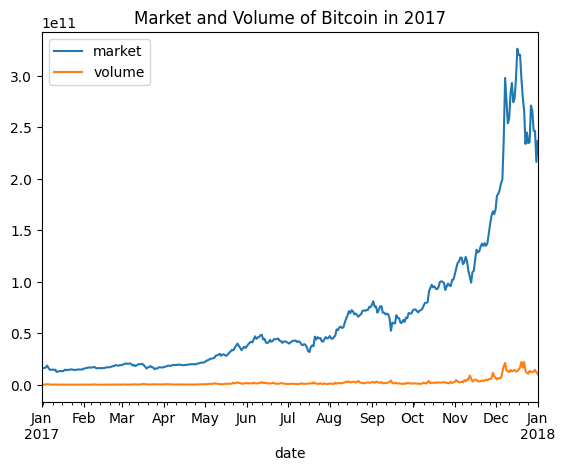

In [13]:
reduced_crypto.plot(kind='line',x ="date", y=['market','volume'], title="Market and Volume of Bitcoin in 2017")

* la funzione **plot** applicata direttamente a **DataFrame** e a **Series**
* il parametro **kind** indica il tipo di grafico che voglio ottenere

## Plotting con Matplotlib

* lo stesso grafico lavorando direttamente con il metodo *plot* sull'oggetto *pyplot* (alias **plt**)
    * passando oggetti di tipo *Series* per le ascisse e per le ordinate
    * impostando direttamente le proprietà della plotting area


<class 'pandas.core.series.Series'>


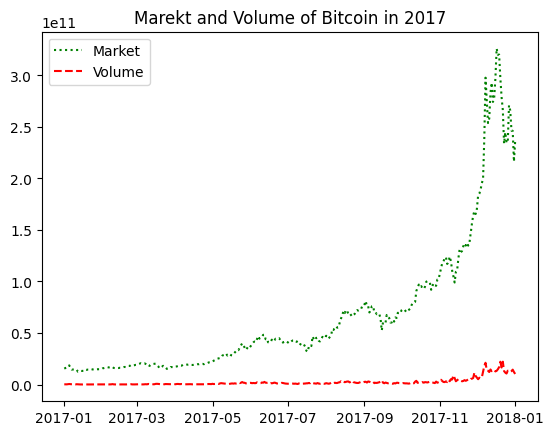

In [14]:
print(type(reduced_crypto["date"]))
plt.plot(reduced_crypto["date"], reduced_crypto["market"],":g",label="Market")
plt.plot(reduced_crypto["date"], reduced_crypto["volume"],"--r",label="Volume")
plt.title("Marekt and Volume of Bitcoin in 2017")
plt.legend(loc="upper left")
plt.show()


* differenze con **Pandas**
    * occorre inserire esplicitamente le **label**
    * posso personalizzare tipi di linea, colori e tanti altri parametri.
    


## *pyplot.plot()*: i parametri

<center>
<img src="Figures/Parameters.jpg" style="width:400px;height:1000px;"/>

## *pyplot.plot()*: i colori

<center>
<img src="Figures/Colors.jpg" style="width:500px;height:500px;"/>

## Bar Plot

* utile negli scenari in cui si hanno un certo numero di **categorie** e un valore quantitativo per ogni categoria da mettere in evidenza
* esempi
    * valori totali di vendita per marche diverse di auto
    * età media degli atleti olimpici per divresi tipi di sports
    * numero di persone che vivono in diverse città
* enfasi sulla visualizzaione di **alcuni valori** di interesse


## Bar Plots 

*  descrivere con una visualizzazione opportuna il valore di mercato e il volume degli scambi delle prime 5 cryptocurrenciesper valore di mercato
* il valore di mercato di riferimento è quello dell'ultima rilevazione del **DataSet**
* utilizzeremo le funzioni **group_by** e **last()**


## Preparazione dei dati


In [15]:
top_5_currency_names_volumes = df_crypto.groupby('name')['volume'].last().sort_values(ascending=False).head(5).index
top_5_currency_volumes = df_crypto.groupby('name')['volume'].last().sort_values(ascending=False).head(5).values
top_5_currency_volumes_series = df_crypto.groupby('name')['volume'].last().sort_values(ascending=False).head(5)

print(type(top_5_currency_volumes_series))
print(top_5_currency_names_volumes)
print(top_5_currency_volumes)

# dovo avere applicato l'operatore *last* a ogni gruppo, si ottiene un oggetto di tipo Series
# questo oggetto rappresenta l'ultimo volume di mercato rilevato per ogni cryptomoneta, si ordina e si prendono le prime 5
# utilizzo le proprietà index e values dell'oggetto Series


<class 'pandas.core.series.Series'>
Index(['Bitcoin', 'Ethereum', 'Tether', 'Ripple', 'Litecoin'], dtype='object', name='name')
[9285290000 4269530000 4078980000 1286180000  844678000]


## Preparazione dei dati

In [16]:
top_5_currency_names_markets = df_crypto.groupby('name')['market'].last().sort_values(ascending=False).head(5).index
top_5_currency_markets = df_crypto.groupby('name')['market'].last().sort_values(ascending=False).head(5).values
top_5_currency_markets_series = df_crypto.groupby('name')['market'].last().sort_values(ascending=False).head(5)

print(type(top_5_currency_markets_series))
print(top_5_currency_names_markets)
print(top_5_currency_volumes)


<class 'pandas.core.series.Series'>
Index(['Bitcoin', 'Ethereum', 'Ripple', 'Bitcoin Cash', 'Cardano'], dtype='object', name='name')
[9285290000 4269530000 4078980000 1286180000  844678000]


## Plotting con Pandas: Bar Plot

<Axes: title={'center': 'Top5 per volume'}, xlabel='name'>

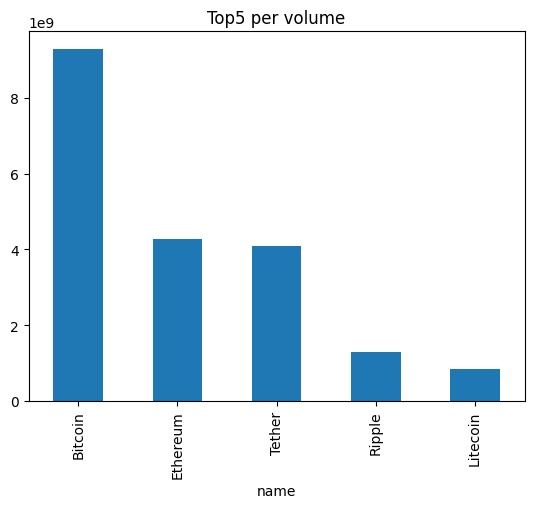

In [17]:
top_5_currency_volumes_series.plot(kind="bar",title="Top5 per volume")

## Plotting con Pandas:  Bar Plot

<Axes: title={'center': 'top 5 per mercato"'}, xlabel='name'>

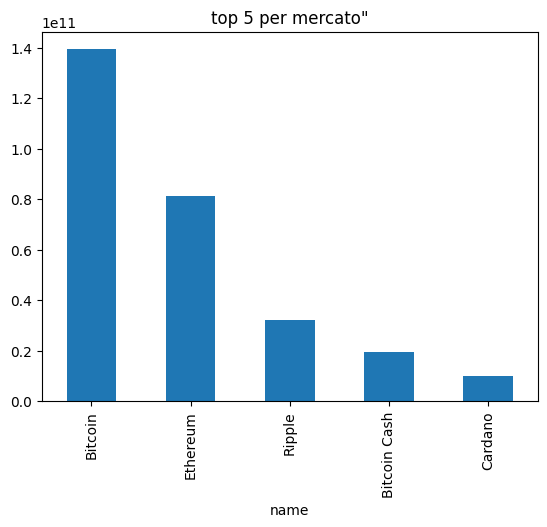

In [18]:
top_5_currency_markets_series.plot(kind="bar", title='top 5 per mercato"')

## Plotting con Pandas: Bar Plot

<Axes: ylabel='name'>

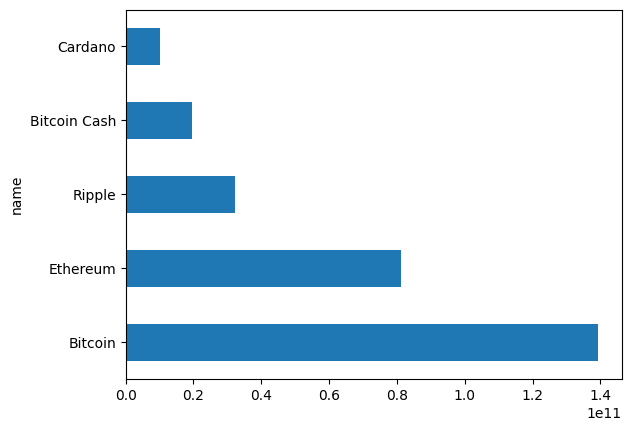

In [19]:
top_5_currency_markets_series.plot(kind="barh")

* può essere utile quando le etichette sono lunghe e, se messe in verticale, si sovrappongono


## Plotting con Pandas: Pie Charts

<center>
<img src="Figures/PieChart.jpg" style="width:600px;height:400px;"/>

* utile quando si vogliono mettere a confronto  le proporzioni tra i diversi valori come parte del tutto
* esempi
    * percentuali di votanti per partiti politici diversi
    * le porzioni di mercato di diverse aziende
* svantaggi
    * diventa poco leggibile quando il numero di valori è molto alto
    * poco adatto per mostrare **evoluzione temporale** di un fenomeno
        * tanti pie chart affiancati?


## Plotting con Pandas: pie charts

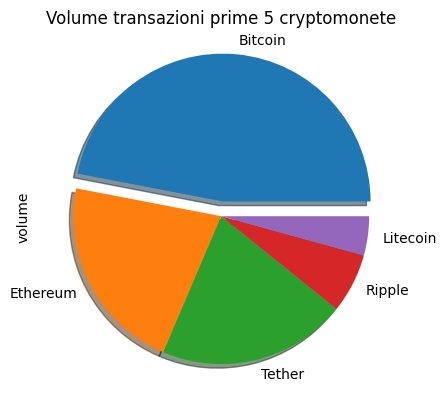

In [20]:
my_explode = (0.1, 0, 0, 0, 0) 
top_5_currency_volumes_series.plot(kind='pie', shadow=True, explode=my_explode, title="Volume transazioni prime 5 cryptomonete");


* **explode parameter** permette di applicare un **offset** al raggio di uno o più **slices** del **pie chart**
* in questo modo è possibile mettere in evidenza uno o più slices del pie chart
* default value **explode=None**
* se presente deve essere un **array** uguale al numero delle **slices**
    * ogni entrata specifica l'offset di quella slice
    

## Plotting con Pandas: pie charts

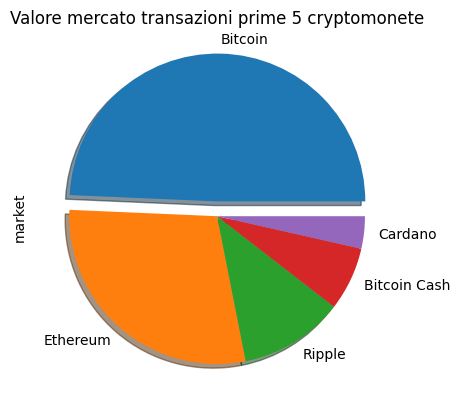

In [21]:
my_explode = (0.1, 0, 0, 0, 0) 
top_5_currency_markets_series.plot(kind='pie', shadow=True, explode=my_explode, title="Valore mercato transazioni prime 5 cryptomonete");


## Plotting con  Pandas, pie chart "temporali": stacked bar

* descrivere, con una visualizzazione opportuna, l'evoluzione del volume di mercato delle prime 5 criptomonete
* considerare il mese di **Maggio** 2017
* costruire un **DataFrame** con una riga per ogni giorno del mese che riporta le valutazioni delle 5 monete
* plottare il **DataFrame** direttamente da **Pandas**


In [22]:
mask = (df_crypto.date >= pd.Timestamp('2017-05-01')) & (df_crypto.date <= pd.Timestamp('2017-05-30'))
df_reduced_stack= df_crypto.loc[mask]

Bitcoin_volume=df_reduced_stack[df_reduced_stack['name']=='Bitcoin'].volume
Ethereum_volume=df_reduced_stack[df_reduced_stack['name']=='Ethereum'].volume
Ripple_volume=df_reduced_stack[df_reduced_stack['name']=='Ripple'].volume
Litecoin_volume=df_reduced_stack[df_reduced_stack['name']=='Litecoin'].volume
Tether_volume=df_reduced_stack[df_reduced_stack['name']=='Tether'].volume

print(Bitcoin_volume.head(5))
ind=pd.RangeIndex(start=1, stop=31, step=1)

Bitcoin_volume.index = ind 
print(Bitcoin_volume.head(5))


1464    713624000
1465    477338000
1466    583796000
1467    933549000
1468    946036000
Name: volume, dtype: int64
1    713624000
2    477338000
3    583796000
4    933549000
5    946036000
Name: volume, dtype: int64


## Concatenare Series per ottenere un DataFrame

<center>
<img src="Figures/ConcatAxis_0.jpg" style="width:600px;height:500px;"/>

* concatenare **DatFrames** su **axis=0** (righe)

## Creare un DataFrame a partire da Series

<center>
<img src="Figures/ConcatAxis_1.jpg" style="width:600px;height:500px;"/>

* concatenare **DatFrames** su **axis=1** (colonne)

## Plotting with Panda, pie chart "temporali": stacked bar

In [23]:
Ethereum_volume.index = pd.RangeIndex(start=1, stop=31, step=1)
Ripple_volume.index = pd.RangeIndex(start=1, stop=31, step=1)
Litecoin_volume.index = pd.RangeIndex(start=1, stop=31, step=1)
Tether_volume.index = pd.RangeIndex(start=1, stop=31, step=1)
df=pd.concat({
              'Bitcoin': Bitcoin_volume,
              'Ethereum': Ethereum_volume,
              'Ripple': Ripple_volume,
              'Litecoin': Litecoin_volume,
              'Tether': Tether_volume
               },axis=1)

df.head(5)


,Bitcoin,Ethereum,Ripple,Litecoin,Tether
1,713624000,376842000,61730100,66989400,44582500
2,477338000,193773000,33814700,38692100,22268100
3,583796000,141922000,42869000,253441000,33500300
4,933549000,366847000,153374000,242912000,56022400
5,946036000,331928000,184430000,218949000,69583300


## Plotting with Pandas: stacked bar, pie chart "temporali"

<Axes: >

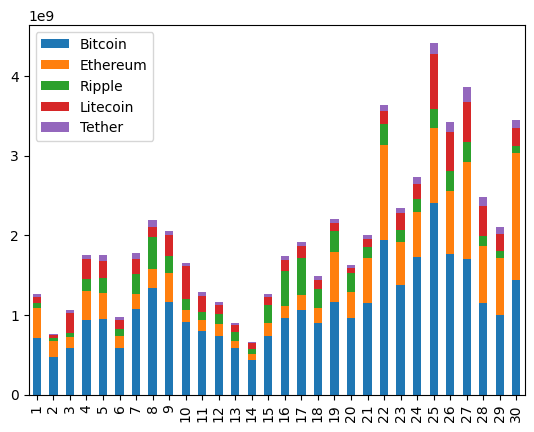

In [24]:
df.plot(kind='bar', stacked=True)


## Plotting with Pandas: stacked area

<Axes: >

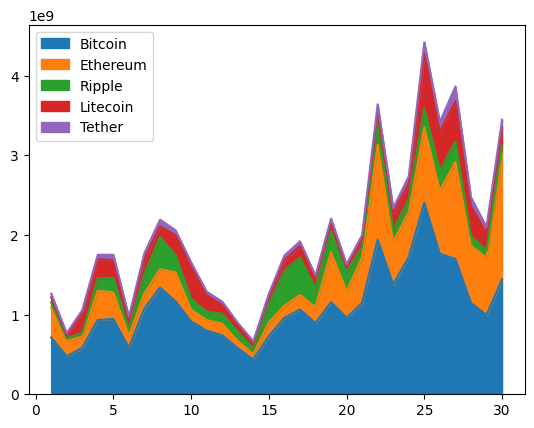

In [25]:
df.plot(kind='area')


## Plotting with Pandas: stacked bar, pie chart "temporali"

<Axes: >

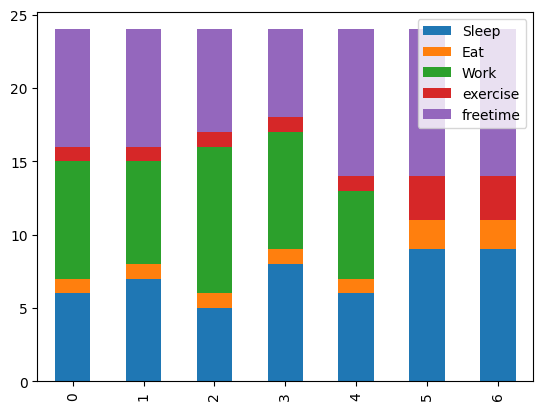

In [26]:
sleep = pd.Series([6,7,5,8,6,9,9])
eat =   pd.Series([1,1,1,1,1,2,2])
work =  pd.Series([8,7,10,8,6,0,0])
exercise = pd.Series([1,1,1,1,1,3,3])
freetime = pd.Series([8,8,7,6,10,10,10])

df=pd.concat({
              'Sleep': sleep,
              'Eat': eat,
              'Work': work,
              'exercise': exercise,
              'freetime': freetime,
               },axis=1)

df.plot(kind='bar', stacked=True)



## Plotting with Pandas: grouped bat plot

* tutti gli esempi visti fino a questo punto si riferiscono ad una unica **variabile categoriale**
* frequentemente, però si è interessati a **più variabili categoriali**
* esempio
    * l'Università fornisce dati sui propri studenti
    * divisi per anno di iscrizione (prima variabile categoriale)
    * per ogni anno, divisi per genere e provenienze (seconda e terza variabile categoriale)
* come visualizzare?
    * un insieme di gruppi, sull'asse delle x, relativi ad una variabile categoriale
    * un insieme di barre, per ogni gruppo, corrispondenti ai valori della  seconda variabile categoriale
* nell'esempio successivo
    * prima variabile categoriale: date di un periodo
    * seconda variabile categoriale: prezzo più alto di ogni criptomoneta in quella data


## Plotting with Pandas: Grouped Bat Plot

<Axes: title={'center': 'High Price'}, xlabel='Day'>

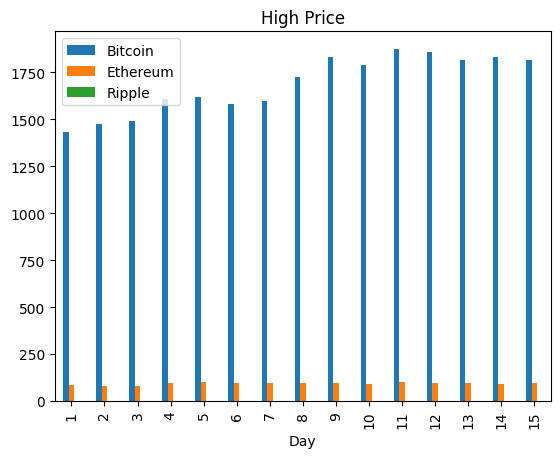

In [27]:
mask_1 = (df_crypto.date >= pd.Timestamp('2017-05-01')) & (df_crypto.date <= pd.Timestamp('2017-05-15'))
df_Bitcoin= df_crypto[(df_crypto["name"]=="Bitcoin") & (mask_1)]['high']
df_Ethereum= df_crypto[(df_crypto["name"]=="Ethereum") & (mask_1)]['high']
df_Ripple= df_crypto[(df_crypto["name"]=="Ripple") & (mask_1)]['high']

names_series=pd.Series(["Bitcoin", "Ethereum", "Ripple"])

df_Bitcoin.index = pd.RangeIndex(start=0, stop=15, step=1)
df_Ethereum.index = pd.RangeIndex(start=0, stop=15, step=1)
df_Ripple.index = pd.RangeIndex(start=0, stop=15, step=1)

ind_1=pd.RangeIndex(start=1, stop=16, step=1)
days_1=pd.Series(ind_1)

df=pd.concat({'Day': days_1,
              'Bitcoin': df_Bitcoin,
              'Ethereum': df_Ethereum,
              'Ripple': df_Ripple,
               },axis=1)

df.plot(x='Day', 
        kind='bar', 
        stacked=False, 
        title='High Price') 


## Grouped Bar Plots: la scala logarirmica

<Axes: title={'center': 'High Price'}, xlabel='Day'>

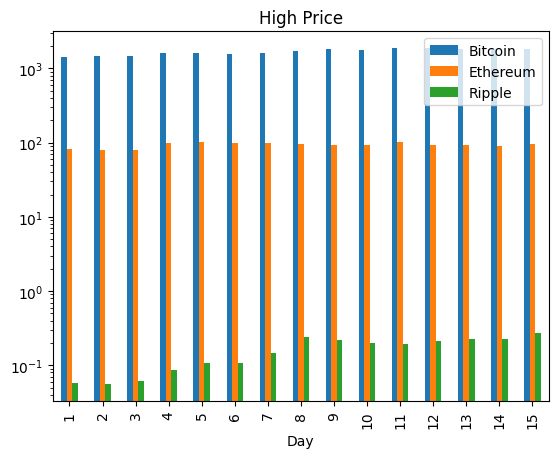

In [28]:
df.plot(x='Day', 
        kind='bar', 
        stacked=False, 
        title='High Price',
        logy=True)
        

## Grouped Bar Plot: il prezzo di Bitcoin

* prima variabile categoriale: la data
* seconda variabile categoriale: valori di apertura e chiusura del prezzo del Bitcoin in quella data
    

In [29]:
reduced_crypto = df_crypto.loc[(df_crypto.name == 'Bitcoin') & 
                               (df_crypto.date.isin(pd.date_range("2018-01-01", "2018-01-15")))]
data_frame= reduced_crypto[['date','open','close','low','high']]
data_frame['date'] = pd.to_datetime(data_frame['date']).dt.date
data_frame
new_data_frame=data_frame.reset_index(drop=True)


## Grouped Bar Plot: il prezzo di Bitcoin

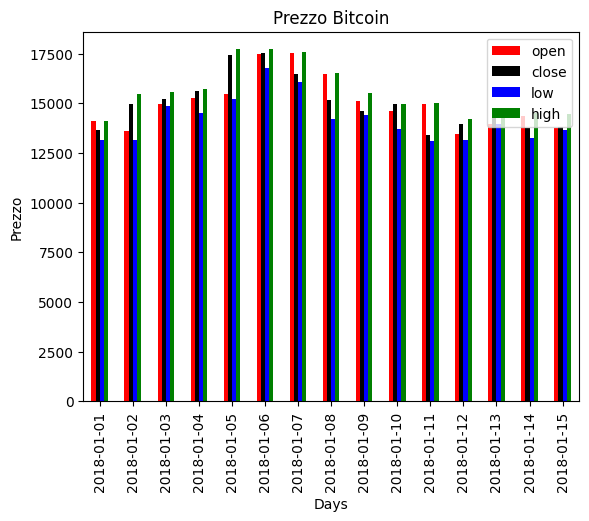

In [30]:
new_data_frame.plot(x='date', y=['open','close','low','high'], kind='bar', color=['red', 'black','blue', 'green'])
plt.title("Prezzo Bitcoin")
plt.xlabel('Days')
plt.ylabel('Prezzo')
plt.show()


## Plotting histograms

* caratteristiche di un **istogramma**
  * rappresentazione grafica della **distribuzione** dei dai
  * stima della distribuzione di probabilità di una variabile continua o discreta
* come costruire un istogramma
    * primo passo: **binning** del data range
       * dividere l'intervallo dei valori in sottointervalli e poi contare quanti valori cadono in quell'intervallo di valori
       * bins sono **consecutivi** (nessun gap) e non **sovrapposti**
* visualizzato come un insieme di **barre adiacenti**
    l'altezza di ogni barra rappresenta il numero (o la percentuale) di valori in quell'intervallo
  

## Bar Plot e Istogrammi sono la stessa cosa? la risposta è negativa!

* Scopo
    * gli istogrammi 
        * utilizzati per analizzare la distribuzione, l'asimmetria (skewness), di un DataSet
    e scoprire pattern, trends, outliers
    * barplot
        * utilizzati per confrontare diverse categorie di dati o gruppi di dati, 
          evidenziandoi la differenza tra le diverse categorie
* Tipo di dati
    * istogrammi
        * dati considerati come una sequenza **continua**
        * i dati sono divisi in intervalli (bins), l'altezza di ogni bar rappresenta la frequenza dei dati in quell'intervallo
    * bar plot
        * ogni barra rappresenta una certa categoria la cui altezza indica il valore associato a quella categoria
* Spazio tra le barre
    * istogrammi
        * barre **adiacenti**, perchè i dati sono continui oppure discreti, ma ordinati in una sequenza
    * bar plot
        * lo spazio tra le barre enfatizza che ogni barra rappresenta una categoria diversa
        
* Assi
    * istogrammi
        * sia la x che la y rappresentano valori numerici
        * asse x diviso in intervalli (bins)
        * asse y frequenza dei dati in quel bin
    * bar chart 
        * asse x rappresenta categorie diverse
        * asse y valore associato a ogni categoria


## Bar Plot e Istogrammi sono la stessa cosa?

<center>
<img src="Figures/HistogramBarPlot.jpg" style="width:1200px;height:450px;"/>

* la risposta è no, e le differenze sono evidenziate in figura

## Plotting with PANDAS: histogram

* analisi di un **DataSet**, che riporta dati per ogni paese e per una sequenza di anni, dati sulla popolazione

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data_url = 'http://bit.ly/2cLzoxH'
gapminder = pd.read_csv(data_url)
gapminder.head()


,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


## Plotting with PANDAS: histogram

<Axes: title={'center': 'LifeExpectancy'}, ylabel='Frequency'>

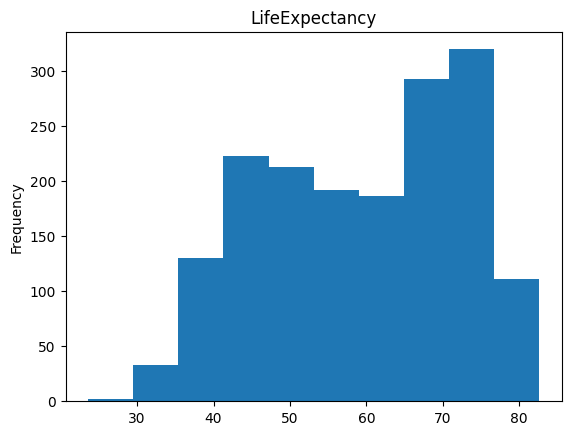

In [32]:
gapminder['lifeExp'].plot(kind='hist',bins=10, title = 'LifeExpectancy')


## Plotting with PANDAS: histogram

Text(0, 0.5, 'Frequency')

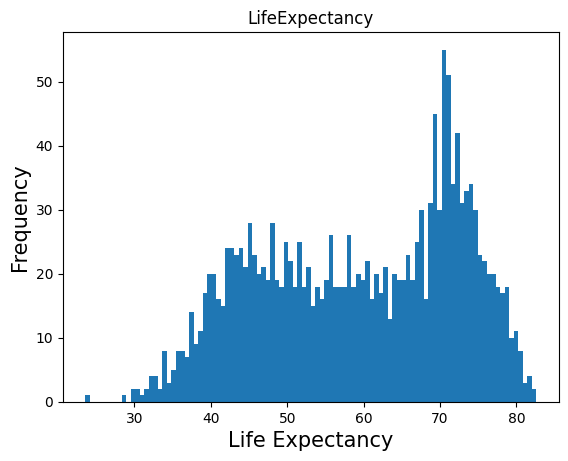

In [33]:
gapminder['lifeExp'].plot(kind='hist',bins=100, title = 'LifeExpectancy')
plt.xlabel("Life Expectancy", fontsize=15)
plt.ylabel("Frequency",fontsize=15)


* la scelta della dimensione dei **bin** è fondamentale
* troppo pochi **bin**, come nella figura precedente, possono semplificare troppo la struttura della distribuzione
* ditribuzione più granulare permette di visualizzare
    * l'**outlier** alla sinistra
    * il picco corrispondente ai **72 anni**


## Plotting with PANDAS: histogram

Text(0, 0.5, 'Frequency')

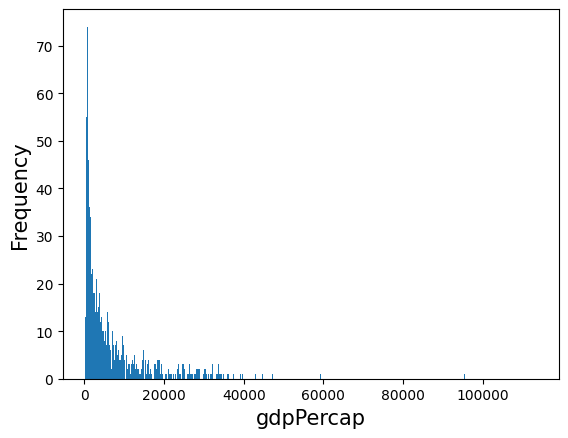

In [34]:
gapminder['gdpPercap'].plot(kind='hist',bins=1000)
plt.xlabel("gdpPercap", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
#plt.xscale('log')


*  presenza di valori estremi, nella **coda** della distribuzione
* "schiaccia"la parte più interessante della distribuzine a sinistra

## Plotting with PANDAS: histogram

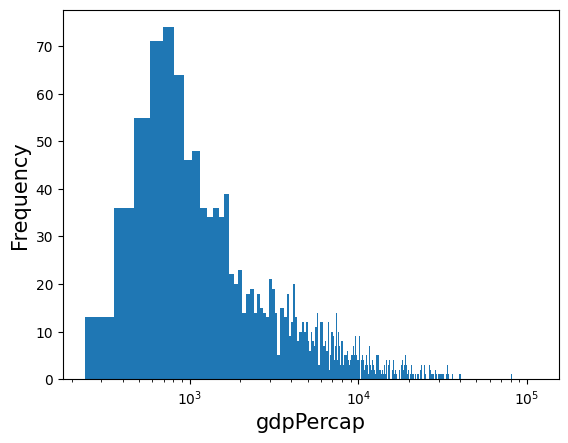

In [35]:
gapminder['gdpPercap'].plot(kind='hist',bins=1000)
plt.xlabel("gdpPercap", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.xscale('log')


## Matplotlib: interfaccia "a oggetti"


* Idea di base
    * nessuno stato globale come **pyplot** (MatLab-like)
    * tutto quello che può essere rappresentato è un oggetto, secondo la filosofia a oggetti
    * vantaggio evidente quando si creano più figure o quando una figura contiene più di un subplot

* ogni oggetto **Matplotlib** è organizzato gerarchicamente, secondo una struttura "tree-like"

* due oggetti: **figure** e **axes**
    * **figura**: container che contiene uno o più plot
    * **axes**: sinomimo di plot, plot area
        * attenzione: il termine può creare un pò di confusione, perchè indica non solo gli assi della zona di plot, ma tutta la zona
        
* la gerarchia non finisce con la plot area
    * all'interno gli assi
    * all'interno degli assi i **tick**
    *....
        

## Matplotlib: struttura gerarchica

<center>
<img src="Figures/MatPlotLibHierarchy.jpg" style="width:1100px;height:800px;"/>

## Matplotlib: struttura gerarchica

<center>
<img src="Figures/MatPlotLibHierarchy1.jpg" style="width:1000px;height:600px;"/>

## Matplotlib: gli oggetti

<center>
<img src="Figures/Anatomy.jpg" style="width:1000px;height:1000px;"/>

* l'invocazione del metodo *subplots* crea una figura, al livello top, e uno o più di un plot

## Matplotlib: interfaccia a oggetti

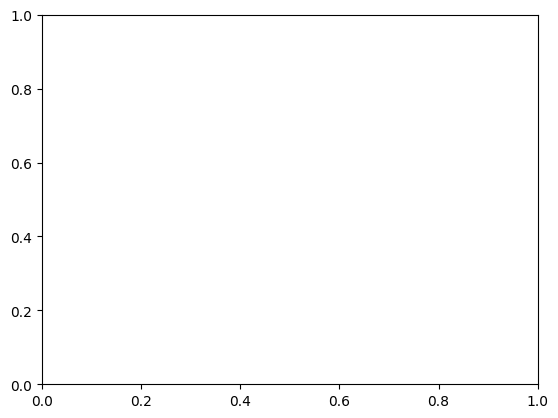

In [36]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1)


* in questo caso, invocando *subplots* senza parametri, viene creata una figura con un solo "plot*, indicato come **ax**

## Matplotlib: stabilire la plotting area

* ma quali sono i vantaggi?
* stabilire la dimensione della plotting area
* utile negli esempi precedenti in cui le barre risultavano troppo vicine


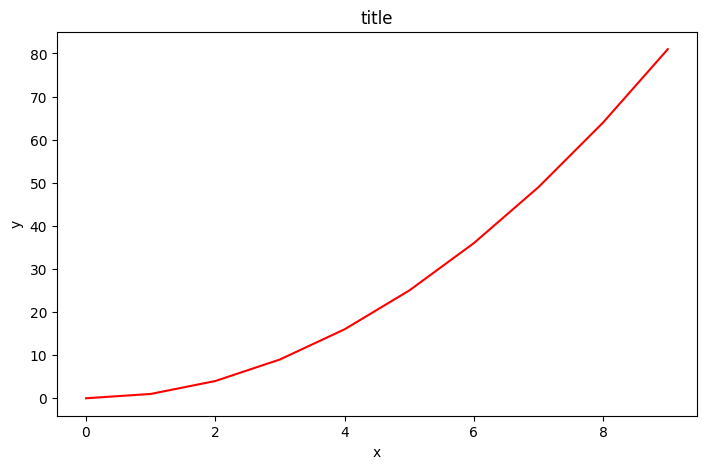

In [37]:
import numpy as np
x = np.arange(10)
y = x**2

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.0, 0.8]) # left, bottom, width, height (range 0 to 1)
axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');


## Matplotlib: inserire plots in altri plots


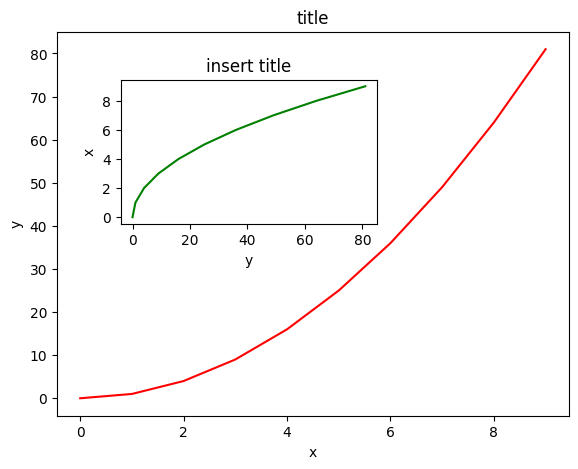

In [38]:
fig = plt.figure()
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# main figure
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title')

# insert
axes2.plot(y, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('insert title');


## Matplotlib: affiancare plots


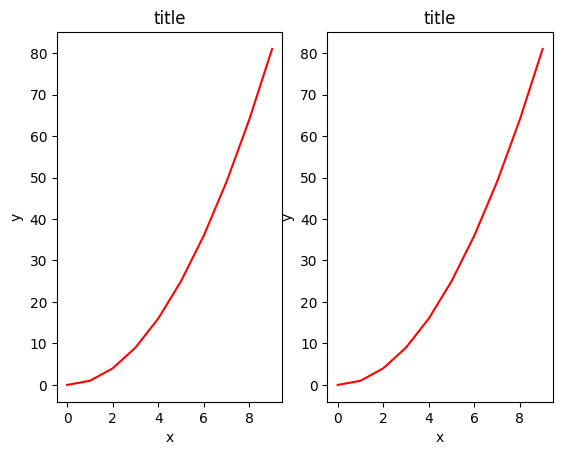

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=2)
for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')


##  Matplotlib: pie chart affiancati

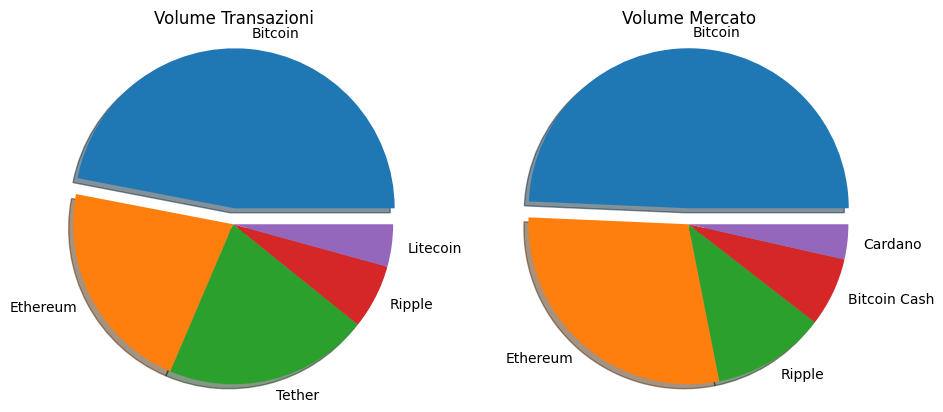

In [40]:
fig, (ax1,ax2) = plt.subplots(1,2, sharey= 'row')

plt.subplots_adjust(wspace=10)

explode = (0.1, 0, 0, 0, 0) 
ax1.pie(top_5_currency_volumes_series, explode=my_explode, labels=top_5_currency_names_volumes, shadow=True, startangle=0)
ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Volume Transazioni")

explode = (0.1, 0, 0, 0, 0) 
ax2.pie(top_5_currency_markets_series, explode=my_explode, labels=top_5_currency_names_markets, shadow=True, startangle=0)
ax2.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title("Volume Mercato")

plt.show()


## Plotting con Matplotlib: personalizzare i ticks

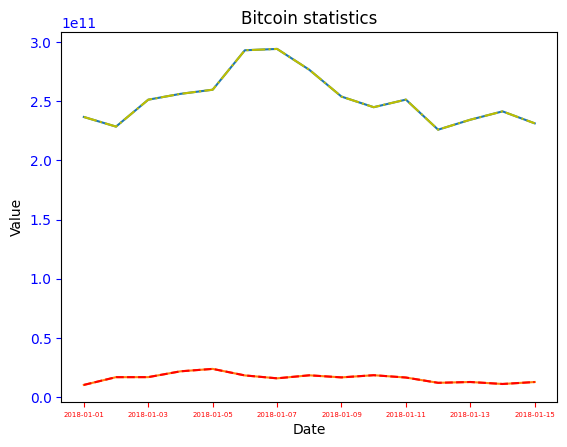

In [41]:
X= reduced_crypto["date"]
Y= reduced_crypto["market"]
Z= reduced_crypto["volume"]
fig,ax = plt.subplots()

ax.set(xlabel='Date', ylabel='Value', title='Bitcoin statistics')

ax.plot(X,Y,
        X,Y,"-.y",
        X,Z,
        X,Z,"--r")

for xtick in ax.get_xticklabels():
    xtick.set_fontsize(5)
    
ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='blue')
plt.show()


## Plotting con Matplotlib: personalizzare i bar plot 

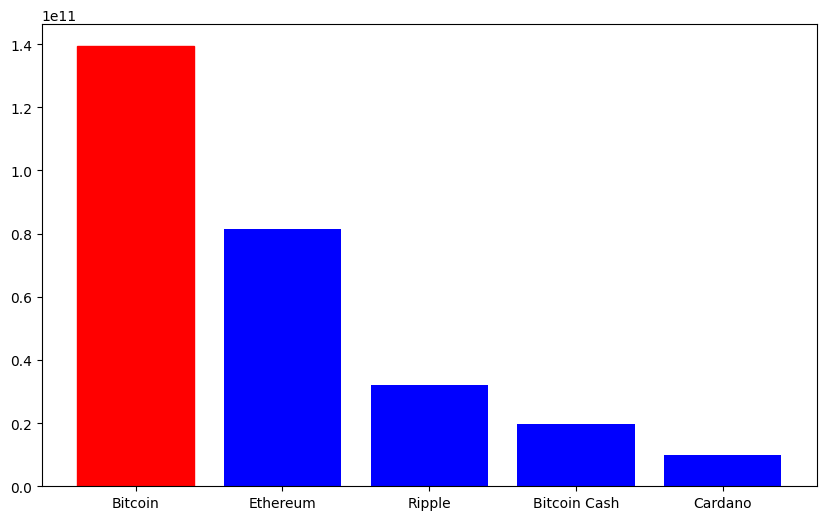

In [42]:
top_5_currency_names = df_crypto.groupby('name')['market'].last().sort_values(ascending=False).head(5).index
top_5_currency_markets = df_crypto.groupby('name')['market'].last().sort_values(ascending=False).head(5).values

fig, ax = plt.subplots(1,1,figsize = (10,6))

bars=ax.bar(top_5_currency_names , top_5_currency_markets,  color= "blue")

bars[0].set_color('red')


## Plotting con Matplotlib: personalizzare i bar plot 

Text(0, 0.5, 'Scores')

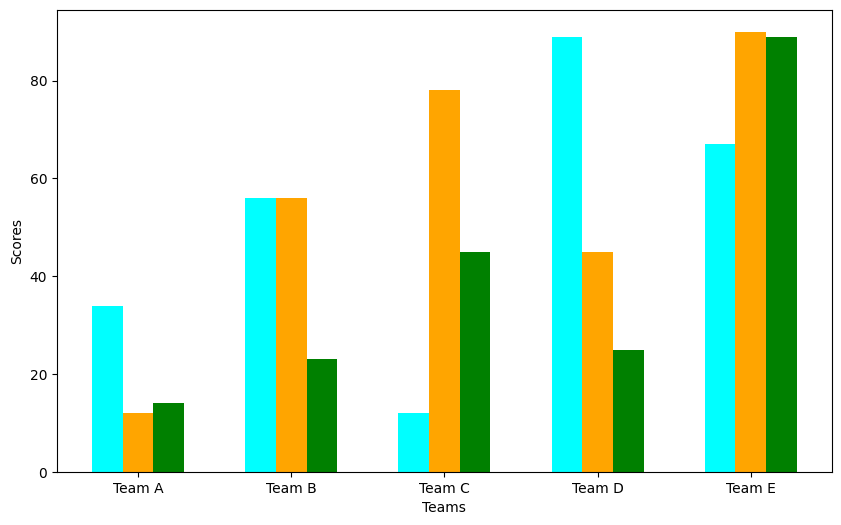

In [43]:
import matplotlib.pyplot as plt
import numpy as np

x=np.array([1, 2, 3, 4, 5])
y1 = [34, 56, 12, 89, 67]
y2 = [12, 56, 78, 45, 90]
y3 = [14, 23, 45, 25, 89]
width = 0.2
fig, ax = plt.subplots(1,1,figsize = (10,6))

ax.bar(x-0.2, y1, width, color='cyan')
ax.bar(x, y2, width, color='orange')
ax.bar(x+0.2, y3, width, color='green')
ax.set_xticks(x, ['Team A', 'Team B', 'Team C', 'Team D', 'Team E'])
ax.set_xlabel("Teams")
ax.set_ylabel("Scores")
#ax.set_legend(["Round 1", "Round 2", "Round 3"]


## SQL Joins in Python Pandas: Merge

<center>
<img src="Figures/SyntheticMerge.jpg" style="width:1000px;height:400px;"/>

* combina due **Dataframe**
* si basa sulle colonne indicate come **on**
* piò eseguire diversi tipi di **Merge**
    * **inner**
    * **left**
    * **right**
    * **outer**


## SQL Joins in Python Pandas: Merge

In [44]:
user_usage = pd.read_csv("DataSets/user_usage.csv")
user_usage


,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
0,21.97,4.82,1557.33,22787
1,1710.08,136.88,7267.55,22788
2,1710.08,136.88,7267.55,22789
3,94.46,35.17,519.12,22790
4,71.59,79.26,1557.33,22792
...,...,...,...,...
235,260.66,68.44,896.96,25008
236,97.12,36.50,2815.00,25040
237,355.93,12.37,6828.09,25046
238,632.06,120.46,1453.16,25058


## SQL Joins in Python Pandas: Merge

In [45]:
user_device = pd.read_csv("DataSets/user_device.csv")
user_device


,use_id,user_id,platform,platform_version,device,use_type_id
0,22782,26980,ios,10.2,"iPhone7,2",2
1,22783,29628,android,6.0,Nexus 5,3
2,22784,28473,android,5.1,SM-G903F,1
3,22785,15200,ios,10.2,"iPhone7,2",3
4,22786,28239,android,6.0,ONE E1003,1
...,...,...,...,...,...,...
267,23049,29725,android,6.0,SM-G900F,1
268,23050,29726,ios,10.2,"iPhone7,2",3
269,23051,29726,ios,10.2,"iPhone7,2",3
270,23052,29727,ios,10.1,"iPhone8,4",3


## SQL Joins in Python Pandas: Merge

In [46]:
devices = pd.read_csv("DataSets/android_devices.csv")
devices.head(10)


,Retail Branding,Marketing Name,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A
5,7Eleven,IN265,IN265,IN265
6,A.O.I. ELECTRONICS FACTORY,A.O.I.,TR10CS1_11,TR10CS1
7,AG Mobile,AG BOOST 2,BOOST2,E4010
8,AG Mobile,AG Flair,AG_Flair,Flair
9,AG Mobile,AG Go Tab Access 2,AG_Go_Tab_Access_2,AG_Go_Tab_Access_2


## SQL Joins in Python Pandas: Merge

* inner merge
    * mantiene solo le righe dei due dataframe che hanno un valore comune della colonna indicata
    * solo le righe con un valore di **use_id**comune nei **DataFrame** **user_usage** e **user_device**

In [47]:
result = pd.merge(user_usage,
                 user_device[['use_id', 'platform', 'device']],
                 on='use_id',
                 how='inner')
result.head()


,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F


## Inner Merge

<center>
<img src="Figures/Inner.jpg" style="width:1000px;height:600px;"/>


## Inner Merge

In [48]:
print(user_usage.shape)
print(user_device.shape)
print(result.shape)


(240, 4)
(272, 6)
(159, 6)


In [49]:
user_usage['use_id'].isin(user_device['use_id']).value_counts()


use_id
True     159
False     81
Name: count, dtype: int64

## Left Merge (o join)

* mantiene tutti valori nelle righe  del **DataFrame** di sinistra (nel nostro caso **user_usage**)
* le righe del **DataFrame** di destra vngono mantenute nel risultato solo se esiste un match nell'attributo 'on'
* se per qualche riga del **DataFrame** di sinistra non esiste matchm vengono aggiunti dei valori **Nan**


In [50]:
result = pd.merge(user_usage,
                 user_device[['use_id', 'platform', 'device']],
                 on='use_id', how='left')
result


,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F
...,...,...,...,...,...,...
235,260.66,68.44,896.96,25008,NaN,NaN
236,97.12,36.50,2815.00,25040,NaN,NaN
237,355.93,12.37,6828.09,25046,NaN,NaN
238,632.06,120.46,1453.16,25058,NaN,NaN


In [51]:
print(user_usage.shape)
print(result.shape)


(240, 4)
(240, 6)


## Left Merge

<center>
<img src="Figures/Left.jpg" style="width:1000px;height:600px;"/>


* comportamento simile per Right Join

## Outer Join

* ogni riga sia del *DataFrame* di destra che di quello di sinistra viene mantenuta all'interno del risultato
* **NaNs** nelle colonne in cui non si è trovato un match sull'attributo comune


In [52]:
result = pd.merge(user_usage,
                 user_device[['use_id', 'platform', 'device']],
                 on='use_id', how='outer', indicator=True)
result


,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,_merge
0,NaN,NaN,NaN,22782,ios,"iPhone7,2",right_only
1,NaN,NaN,NaN,22783,android,Nexus 5,right_only
2,NaN,NaN,NaN,22784,android,SM-G903F,right_only
3,NaN,NaN,NaN,22785,ios,"iPhone7,2",right_only
4,NaN,NaN,NaN,22786,android,ONE E1003,right_only
...,...,...,...,...,...,...,...
348,260.66,68.44,896.96,25008,NaN,NaN,left_only
349,97.12,36.50,2815.00,25040,NaN,NaN,left_only
350,355.93,12.37,6828.09,25046,NaN,NaN,left_only
351,632.06,120.46,1453.16,25058,NaN,NaN,left_only


## Outer Join

<center>
<img src="Figures/Outer.jpg" style="width:1000px;height:600px;"/>


## Join Indicator

In [ ]:
result.iloc[[0, 1, 200,201, 350,351]]


<center>
<img src="Figures/Indicator.jpg" style="width:1200px;height:500px;"/>


# Aggiungere il manufacturer

In [53]:
result = pd.merge(user_usage,
                 user_device[['use_id', 'platform', 'device']],
                 on='use_id',
                 how='left')

devices.rename(columns={"Retail Branding": "manufacturer"}, inplace=True)
result = pd.merge(result, 
                  devices[['manufacturer', 'Model']],
                  left_on='device',
                  right_on='Model',
                  how='left')

result.head()


,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,manufacturer,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,Samsung,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F,Samsung,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F,Samsung,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303,Sony,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F,Samsung,SM-G361F


In [54]:
devices[devices.Model == 'SM-G930F']


,manufacturer,Marketing Name,Device,Model
10381,Samsung,Galaxy S7,herolte,SM-G930F


## Statistiche finali

In [55]:
result.groupby("manufacturer").agg({
        "outgoing_mins_per_month": "mean",
        "outgoing_sms_per_month": "mean",
        "monthly_mb": "mean",
        "use_id": "count"
    })


,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
manufacturer,,,,
HTC,299.842955,93.059318,5144.077955,44
Huawei,81.526667,9.500000,1561.226667,3
LGE,111.530000,12.760000,1557.330000,2
Lava,60.650000,261.900000,12458.670000,2
Lenovo,215.920000,12.930000,1557.330000,2
Motorola,95.127500,65.666250,3946.500000,16
OnePlus,354.855000,48.330000,6575.410000,6
Samsung,191.010093,92.390463,4017.318889,108
Sony,177.315625,40.176250,3212.000625,16


## Assignment 6

* considerare le consumazioni avvenute in un certo Ristorante
* i files **week_1_sales.csv**   **week_2_sales.csv** registrano li ordini avvenuti in due diverse settimane
* ogni ordine include l'**ID** del cliente che ha fatto l'ordine e l'**id** del cibo che ha ordinato

In [56]:
pd.read_csv("DataSets/week_1_sales.csv").head()


,Customer ID,Food ID
0,537,9
1,97,4
2,658,1
3,202,2
4,155,9


In [57]:
pd.read_csv("DataSets/customers.csv").head()


,ID,First Name,Last Name,Gender,Company,Occupation
0,1,Joseph,Perkins,Male,Dynazzy,Community Outreach Specialist
1,2,Jennifer,Alvarez,Female,DabZ,Senior Quality Engineer
2,3,Roger,Black,Male,Tagfeed,Account Executive
3,4,Steven,Evans,Male,Fatz,Registered Nurse
4,5,Judy,Morrison,Female,Demivee,Legal Assistant


In [58]:
pd.read_csv("DataSets/foods.csv", index_col = "Food ID")


,Food Item,Price
Food ID,,
1,Sushi,3.99
2,Burrito,9.99
3,Taco,2.99
4,Quesadilla,4.25
5,Pizza,2.49
6,Pasta,13.99
7,Steak,24.99
8,Salad,11.25
9,Donut,0.99


## Assignment 6

* concatenare i dati relativi alla settimana in un nuvo **DataFrame**
* trovare i clienti che hanno frequentato il ristorante in entrambe le settimane
* trovare i clienti che hanno frequentato il ristorante in entrambe le settimane e hanno ordinato il solito cibo
* identificare i clienti che hanno frequentato il ristorante solo nella prima settimana o solo nella seconda settimana
* Per ogni cliente che appare nel DataFrame **week1** identificare le informazioni di quel cliente contenute nel **DataFrame** **customers**
